In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("Car Evaluation.csv")

In [4]:
df.head()

,buying price,maintenance cost,number of doors,number of persons,luggage boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacceptable
1,vhigh,vhigh,2,2,small,med,unacceptable
2,vhigh,vhigh,2,2,small,high,unacceptable
3,vhigh,vhigh,2,2,med,low,unacceptable
4,vhigh,vhigh,2,2,med,med,unacceptable


In [6]:
df.shape

(1728, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   buying price       1728 non-null   object
 1   maintenance cost   1728 non-null   object
 2   number of doors    1728 non-null   object
 3   number of persons  1728 non-null   object
 4   luggage boot       1728 non-null   object
 5   safety             1728 non-null   object
 6   decision           1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
df.isnull().sum()

buying price         0
maintenance cost     0
number of doors      0
number of persons    0
luggage boot         0
safety               0
decision             0
dtype: int64

In [10]:
df.describe()

,buying price,maintenance cost,number of doors,number of persons,luggage boot,safety,decision
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacceptable
freq,432,432,432,576,576,576,1210


In [15]:
df.duplicated().sum()

0

In [21]:
for col in df.columns:
    print(df[col].value_counts())
    print("="*40)

vhigh    432
high     432
med      432
low      432
Name: buying price, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maintenance cost, dtype: int64
2        432
3        432
4        432
5more    432
Name: number of doors, dtype: int64
2       576
4       576
more    576
Name: number of persons, dtype: int64
small    576
med      576
big      576
Name: luggage boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacceptable    1210
acceptable       384
good              69
vgood             65
Name: decision, dtype: int64


In [22]:
df['decision'].value_counts()

unacceptable    1210
acceptable       384
good              69
vgood             65
Name: decision, dtype: int64

In [34]:
df.head()

,buying price,maintenance cost,number of doors,number of persons,luggage boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacceptable
1,vhigh,vhigh,2,2,small,med,unacceptable
2,vhigh,vhigh,2,2,small,high,unacceptable
3,vhigh,vhigh,2,2,med,low,unacceptable
4,vhigh,vhigh,2,2,med,med,unacceptable


In [41]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

## splitting data into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.33, random_state = 42)

In [29]:
x_train.shape,y_train.shape

((1157, 6), (1157,))

In [31]:
x_train.dtypes

buying price         object
maintenance cost     object
number of doors      object
number of persons    object
luggage boot         object
safety               object
dtype: object

In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
oe = OrdinalEncoder()

In [52]:
x_train = oe.fit_transform(x_train)

In [53]:
x_test = oe.transform(x_test)

In [54]:
x_train

array([[3., 3., 1., 2., 1., 1.],
       [0., 3., 1., 1., 2., 1.],
       [3., 0., 1., 2., 2., 0.],
       ...,
       [0., 1., 3., 2., 1., 0.],
       [1., 0., 2., 0., 2., 2.],
       [2., 2., 1., 2., 2., 2.]])

In [55]:
x_test

array([[0., 0., 2., 0., 1., 0.],
       [2., 1., 0., 1., 1., 2.],
       [0., 0., 3., 0., 0., 2.],
       ...,
       [3., 0., 1., 1., 1., 1.],
       [3., 1., 1., 1., 2., 1.],
       [3., 3., 3., 0., 2., 0.]])

### Decision Tree classifier using gini 

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [66]:
dtc_gini = DecisionTreeClassifier(criterion='gini',max_depth= 3, random_state = 0)

In [67]:
dtc_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [69]:
y_pred_gini = dtc_gini.predict(x_test)

## checking accuracy score with criterion gini

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.7653


In [76]:
y_pred_train_gini = dtc_gini.predict(x_train)

y_pred_train_gini

array(['unacceptable', 'unacceptable', 'acceptable', ..., 'acceptable',
       'unacceptable', 'unacceptable'], dtype=object)

In [77]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.7744


### check for overfitting and underfitting

In [79]:
print('Training set score: {:.4f}'.format(dtc_gini.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dtc_gini.score(x_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


<IPython.core.display.Javascript object>

[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'gini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'gini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.425\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 262\nvalue = [116, 28, 118, 0]')]

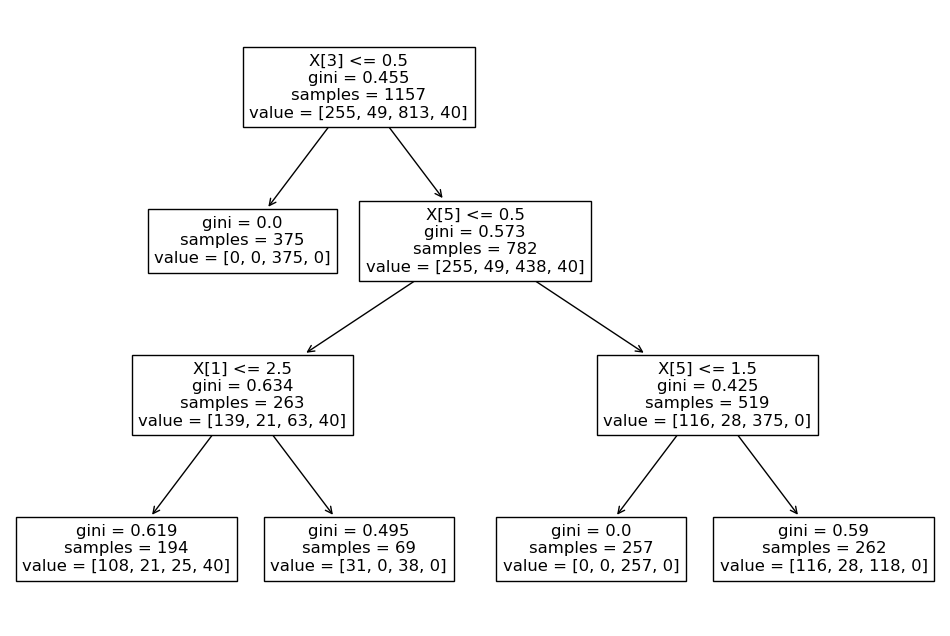

In [84]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtc_gini.fit(x_train,y_train))

### Decision tree classifier with criterion entropy

In [89]:
dtc_ent = DecisionTreeClassifier(criterion='entropy',max_depth= 3, random_state = 0)

In [90]:
dtc_ent.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [92]:
y_pred_ent = dtc_ent.predict(x_test)

### checking accuracy score with criterion entropy

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
print('Model accuracy score with criterion entropy index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_ent)))

Model accuracy score with criterion gini index: 0.7653


In [95]:
y_pred_train_ent = dtc_ent.predict(x_train)

y_pred_train_ent

array(['unacceptable', 'unacceptable', 'acceptable', ..., 'acceptable',
       'unacceptable', 'unacceptable'], dtype=object)

In [96]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_ent)))

Training-set accuracy score: 0.7744


In [97]:
print('Training set score: {:.4f}'.format(dtc_ent.score(x_train, y_train)))

print('Test set score: {:.4f}'.format(dtc_ent.score(x_test, y_test)))

Training set score: 0.7744
Test set score: 0.7653


<IPython.core.display.Javascript object>

[Text(0.375, 0.875, 'X[3] <= 0.5\ngini = 0.455\nsamples = 1157\nvalue = [255, 49, 813, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 375\nvalue = [0, 0, 375, 0]'),
 Text(0.5, 0.625, 'X[5] <= 0.5\ngini = 0.573\nsamples = 782\nvalue = [255, 49, 438, 40]'),
 Text(0.25, 0.375, 'X[1] <= 2.5\ngini = 0.634\nsamples = 263\nvalue = [139, 21, 63, 40]'),
 Text(0.125, 0.125, 'gini = 0.619\nsamples = 194\nvalue = [108, 21, 25, 40]'),
 Text(0.375, 0.125, 'gini = 0.495\nsamples = 69\nvalue = [31, 0, 38, 0]'),
 Text(0.75, 0.375, 'X[5] <= 1.5\ngini = 0.425\nsamples = 519\nvalue = [116, 28, 375, 0]'),
 Text(0.625, 0.125, 'gini = 0.0\nsamples = 257\nvalue = [0, 0, 257, 0]'),
 Text(0.875, 0.125, 'gini = 0.59\nsamples = 262\nvalue = [116, 28, 118, 0]')]

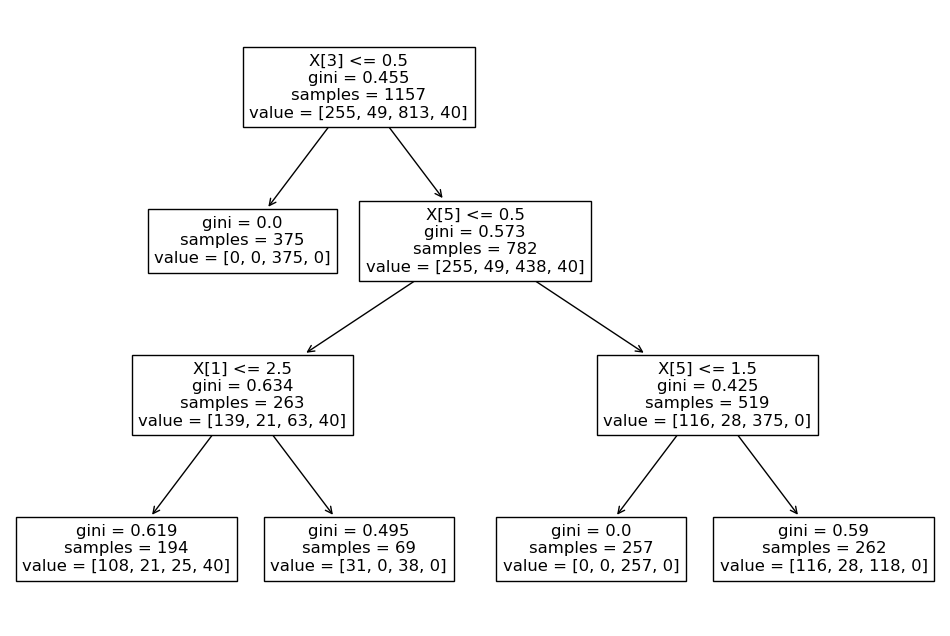

In [99]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(dtc_ent.fit(x_train,y_train))

### confusion metric

In [101]:
from sklearn.metrics import confusion_matrix

In [102]:
cm = confusion_matrix(y_test, y_pred_ent)

In [103]:
cm

array([[ 50,   0,  79,   0],
       [  9,   0,  11,   0],
       [ 10,   0, 387,   0],
       [ 25,   0,   0,   0]], dtype=int64)

In [105]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_ent))

              precision    recall  f1-score   support

  acceptable       0.53      0.39      0.45       129
        good       0.00      0.00      0.00        20
unacceptable       0.81      0.97      0.89       397
       vgood       0.00      0.00      0.00        25

    accuracy                           0.77       571
   macro avg       0.34      0.34      0.33       571
weighted avg       0.68      0.77      0.72       571



C:\Users\bhush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bhush\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
